In [1]:
####### Question2

In [3]:
import pandas as pd
# Import Aggregate National Data
data = pd.read_csv('thq2_Question2.csv')
data

,Country,B,C,D,E,F,G,H
0,"Output,Q",80,150,135,165,95,130,110
1,"Labour,L",60,100,100,120,70,90,80
2,"Capital,K",50,100,80,100,60,80,70


In [4]:
#######(a)

In [5]:
data.mean(1) # mean 

0    123.571429
1     88.571429
2     77.142857
dtype: float64

In [6]:
data.var(1) # variance 

0    914.285714
1    414.285714
2    357.142857
dtype: float64

In [7]:
data.std(1) # standard deviation

0    30.237158
1    20.354010
2    18.898224
dtype: float64

In [8]:
data.median(1) # standard deviation

0    130.0
1     90.0
2     80.0
dtype: float64

In [9]:
#######(b)

In [10]:
# the plot function is included in matplotlib.pyplot package
import matplotlib.pyplot as plt
import numpy as np

(array([1., 1., 0., 1., 0., 2., 0., 1., 1.]),
 array([ 80,  90, 100, 110, 120, 130, 140, 150, 160, 170]),
 <a list of 9 Patch objects>)

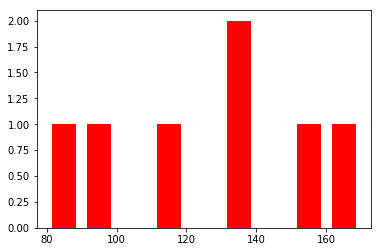

In [11]:
Q = [80, 150, 135, 165, 95, 130, 110]
bins = [80,90,100,110,120,130,140,150,160,170]
plt.hist(Q, bins, histtype="bar", rwidth=0.7, color="r")

(array([1., 1., 1., 1., 2., 1.]),
 array([ 60,  70,  80,  90, 100, 110, 120]),
 <a list of 6 Patch objects>)

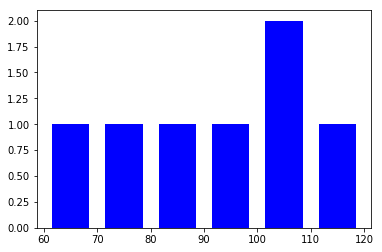

In [12]:
L = [60, 100, 100, 120, 70, 90, 80]
bins = [60,70,80,90,100,110,120]
plt.hist(L, bins, histtype="bar", rwidth=0.7, color="b")


In [13]:
#######(c)

In [14]:
data_3 = pd.read_csv('thq2_Question2_(3).csv')
data_3

,Country,Q,L,K
0,B,80,60,50
1,C,150,100,100
2,D,135,100,80
3,E,165,120,100
4,F,95,70,60
5,G,130,90,80
6,H,110,80,70


In [15]:
def log(x):
    return(np.log(x))

In [16]:
data_3["Q"].apply(log)

0    4.382027
1    5.010635
2    4.905275
3    5.105945
4    4.553877
5    4.867534
6    4.700480
Name: Q, dtype: float64

In [17]:
data_3["L"].apply(log)

0    4.094345
1    4.605170
2    4.605170
3    4.787492
4    4.248495
5    4.499810
6    4.382027
Name: L, dtype: float64

In [18]:
data_3["K"].apply(log)

0    3.912023
1    4.605170
2    4.382027
3    4.605170
4    4.094345
5    4.382027
6    4.248495
Name: K, dtype: float64

In [19]:
#######(d)

In [20]:
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
data_4 = pd.DataFrame({"logL":data_3["L"].apply(log),"logK":data_3["K"].apply(log),"logQ":data_3["Q"].apply(log)})
data_4

,logL,logK,logQ
0,4.094345,3.912023,4.382027
1,4.605170,4.605170,5.010635
2,4.605170,4.382027,4.905275
3,4.787492,4.605170,5.105945
4,4.248495,4.094345,4.553877
5,4.499810,4.382027,4.867534
6,4.382027,4.248495,4.700480


In [22]:
# Let independent variables be the first two columns of data_4
# Let dependent variable be the last two columns of data_4
X = data_4.iloc[:,:2]
Y = data_4.logQ

# Use the LinearRegression model
model = LinearRegression()
 
model.fit(X,Y)
 
a  = model.intercept_ # intercept
b = model.coef_ # coefficient
print("intercept",a,",coefficient:",b)
 
#Print the result
print("Fitted multiple regression model: LogQ = ",round(a,2),"+",round(b[0],2),"* LogL + ",round(b[1],2),"*LogK")



intercept 0.14623321175616866 ,coefficient: [0.54842747 0.50874094]
Fitted multiple regression model: LogQ =  0.15 + 0.55 * LogL +  0.51 *LogK


In [23]:
#######(e)

In [24]:
LogQfit = a + data_4.logL*b[0] + data_4.logK*b[1]
Residuals = data_4.logQ- LogQfit
Residuals

0    0.000136
1   -0.004038
2    0.004123
3   -0.008718
4   -0.005309
5    0.024166
6   -0.010360
dtype: float64

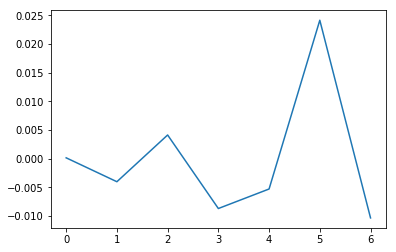

In [25]:
plt.plot(Residuals)

In [26]:
#######(f)

In [27]:
SSresid = sum(pow(Residuals,2))
SStotal = len(Y) * np.var(Y)
rsq = 1 - SSresid/SStotal
rsq

0.9979175612132034

In [28]:
adjusted_rsq = 1 - (1 - rsq)**2*(7-1) / (7-2-1)
adjusted_rsq

0.9999934951730489